Penjelasan 

In [ ]:
#Di Dalam Metodologi CRISP-DM (Cross-Industry Standard Process) Ada 6 Tahapan

Business UnderStanding

In [ ]:
#Kebutuhan Data : Data Diperoleh Dari Kaggle, 
#Dataset insurance.csv berisi kumpulan data yang terdiri dari
#Terdapat beberapa fitur pada data set ini:

#age: Usia penerima manfaat utama.
#sex: Jenis kelamin kontraktor asuransi, perempuan, laki-laki.
#bmi: Indeks massa tubuh, memberikan pengertian tentang tubuh, berat badan yang relatif tinggi atau rendah relatif terhadap tinggi badan.
#children: Jumlah anak yang ditanggung asuransi kesehatan / Jumlah tanggungan.
#smoker: Merokok.
#region: Daerah pemukiman penerima manfaat di AS, timur laut, tenggara, barat daya, barat laut.
#charges: Biaya medis individu ditagih oleh asuransi kesehatan.

#X(Feature) = age,sex,bm,children,smoker,region
#Y(Label) = charges


#biaya perawatan medis untuk pasien yang berbeda. Biaya perawatan tergantung pada usia, jenis kelamin, BMI, jumlah anak, 
#apakah perokok dan wilayah tempat tinggal mereka atau tidak.
#Untuk itu membuat Prediksi biaya asuransi secara akurat


In [ ]:
#Lalu Ada Data Understanding
    #Mengimpor perpustakaan seperti (numpy,pandas,scikit learn, seaborn) dan perpustakaan yg dibutuhkan lainnya
    #mengunduh kumpulan data dan menyimpannya agar kita dapat mulai menggunakannya. 
    #dengan bantuan library pandas kita bisa membaca data
    #melihat berbagai kolom dan jenis atribut apa yang ada dalam data 
    #sehingga kita bisa mendapatkan gambaran kasar tentang data tersebut
    #untuk mengetahui kolom dan tipe data yang sesuai, bersama dengan menemukan apakah mengandung nilai nol atau tidak.

    #contohnya dari data insurance
    #head : age	sex	bmi	children	smoker	region	charges
    #info type data :
    # 0   age       1338 non-null   int64  
    #1   sex       1338 non-null   object 
    #2   bmi       1338 non-null   float64
    #3   children  1338 non-null   int64  
    #4   smoker    1338 non-null   object 
    #5   region    1338 non-null   object 
    #6   charges   1338 non-null   float64

    #describe() / Deskripsi Data
    #mengembalikan jumlah, rata-rata, standar deviasi, nilai minimum dan maksimum, dan kuantil data. 
    #Dari sini kita dapat melihat bahwa kolom charges sangat condong dengan mean > median , 
    #dan nilai maximum terlalu tinggi dibandingkan kuantil dan meannya.

    #perintah (data.isnull().sum()) fungsi akan mengembalikan jumlah entri nol di setiap kolom.
    #kita dapat mengganti data NULL tersebut dengan rata-rata, median, atau apapun yang kita inginkan. 
    #Dalam hal ini, kami akan menggantinya dengan nilai rata-rata setiap kolom.

    #Visualisasi data
    #Python memiliki library seaborn yang dibangun di atas matplotlib .
    #grafik statistik yang menarik untuk menyajikan data sepert
    #Distribusi children : dimana jumlah pasien yang tidak memiliki anak paling banyak.

In [ ]:
#Data Preparation

    #Untuk menghindari beberapa masalah seperti missing data, noise data atau yang lainnya maka ada seleksi fitur
    #lalu akan tahu mana yg dijadikan fiture dan label

    #split data starining dan data testing karena ini data suvervised
    #Dalam hal menggunakannya sebagai model pembelajaran mesin, 
    #kita harus memisahkan data terlebih dahulu menjadi train dan test , 
    #kemudian mengganti NULL dengan mean pada train dan kemudian menerapkan model pasca-pemrosesan ke dalam test.
    ## dari hasil split data yang berasal dari 1338 jadi 335

    #Metode Data Mining : Prediction

    #Model : Regresi Linear
    #mendapatkan akurasi sebesar : 74.973 (74%)
    #lalu membuat inputan data, dan mendapatkan prediksi biaya(charges)

In [ ]:
#Simpan Model
    #Untuk simpan model bisa import pickle dan filename, untuk nama file untuk model tsb 
    #model = pred_insurance.sav
    #Lalu membuat streamli
    #streamlit = pred_insurance.py

#Deployment
    #upload ke github
    #lalu diupload di streamlit share

Data Understanding

In [56]:
#Import Library
import numpy as np #linear algebra
import pandas as pd #data processing, CSV file I/O 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import *
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [57]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [58]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [59]:
df.shape

(1338, 7)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [61]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [63]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
##Encode data berupa object menjadi numerikal

In [64]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for c in df.columns[1:]:  
    if(df[c].dtype=='object'): #Jika nilai kolom adalah objek, itu akan dikonversi ke numerik
        df[c] = encoder.fit_transform(df[c])
    else: #Mengembalikan nilai kolom tanpa encode
        df[c] = df[c]

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86


In [65]:
#Corelasi Matrix : menampilkan data korelasi antar setiap kolom atau fitur-fitur pada dataset

In [67]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109341,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046380,0.017163,0.076185,0.004588,0.057292
bmi,0.109341,0.046380,1.000000,0.012645,0.003968,0.157439,0.198576
children,0.042469,0.017163,0.012645,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003968,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157439,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198576,0.067998,0.787251,-0.006208,1.000000


<Axes: >

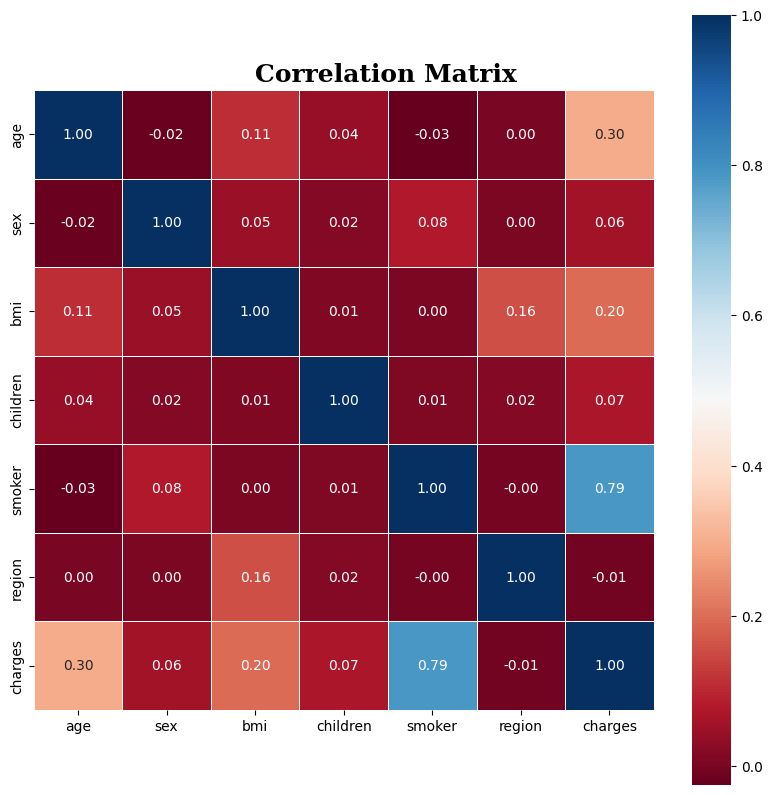

In [68]:
f, ax = plt.subplots(1, 1, figsize = (10, 10))

ax.text(2.5, -0.1, 'Correlation Matrix', fontsize = 18, fontweight = 'bold', fontfamily = 'serif')
sns.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'RdBu', 
            square = True, linewidth = 0.7, ax = ax)

Data Preparation

In [69]:
#Data Distribution Visualisasi

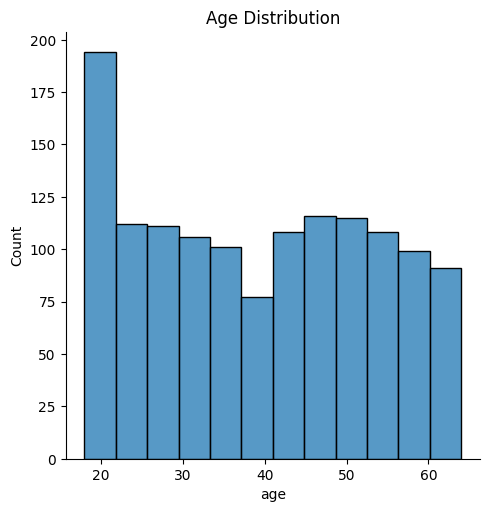

In [70]:
#Distribusi nilai age
plot = sns.displot(data=df, x='age')
plt.title('Age Distribution')
plt.show()

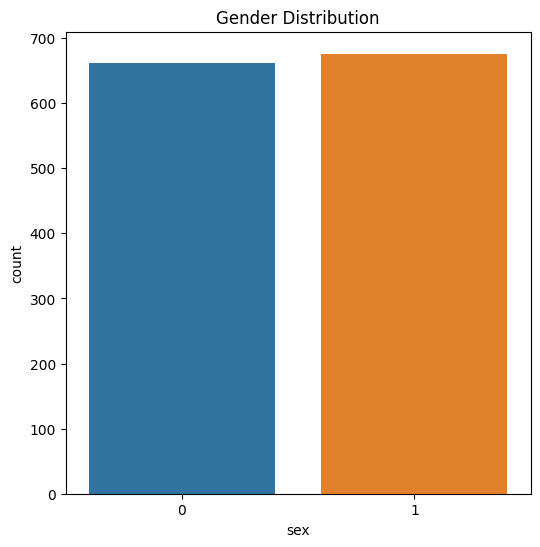

In [71]:
#Distribusi gender, dimana 0 = female dan 1 = male.
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=df)
plt.title('Gender Distribution')
plt.show()

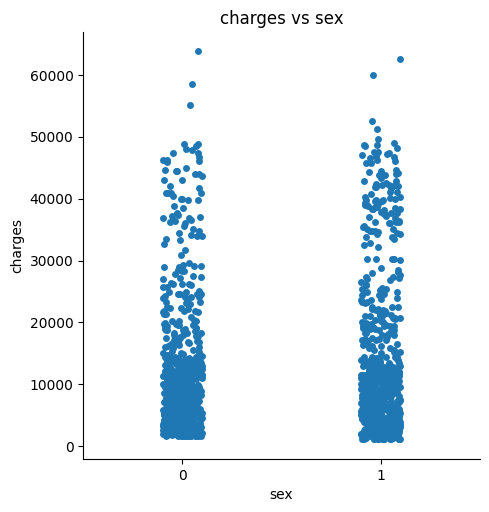

In [72]:
plot = sns.catplot(data=df, x='sex', y='charges')
plt.title('charges vs sex')
plt.show()

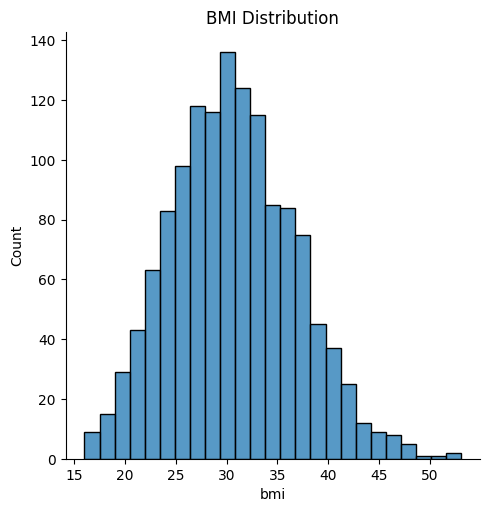

In [73]:
#Distribusi BMI : terdapat bmi tertinggi di angka 30 dengan jumlah sekitar 130an.
plot = sns.displot(data=df, x='bmi')
plt.title('BMI Distribution')
plt.show()

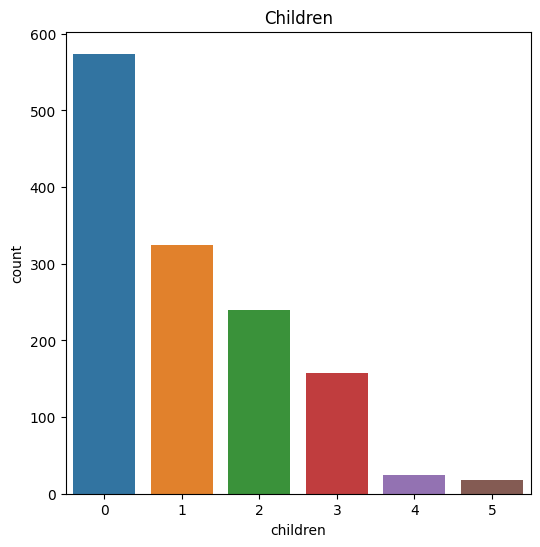

In [74]:
#Distribusi children : dimana jumlah pasien yang tidak memiliki anak paling banyak.
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=df)
plt.title('Children')
plt.show()

Text(0.5, 1.0, 'charges vs children')

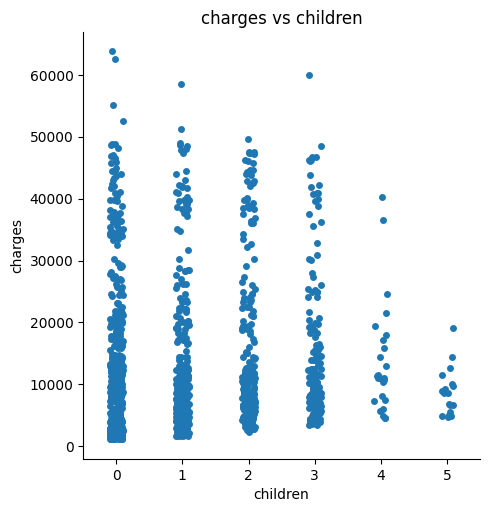

In [75]:
#Visualisasi charges yang dibayar tiap orang jika mempunyai anak.
plot = sns.catplot(data=df, x='children', y='charges')
plt.title('charges vs children')

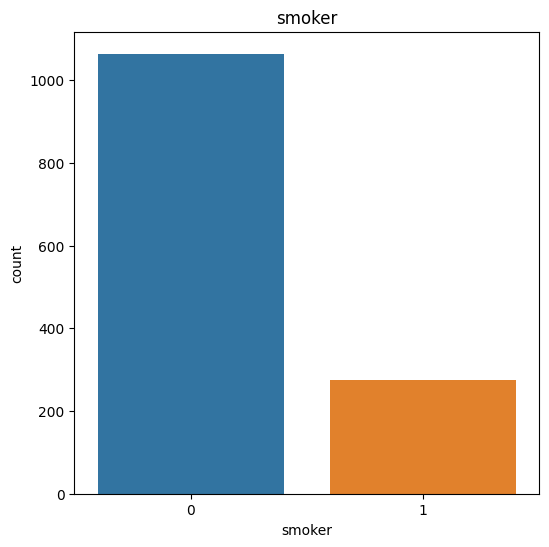

In [76]:
#Distribusi smoker : terdapat jumlah yang tidak merokok (0) lebih banyak dibandingkan yang merokok (1).
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=df)
plt.title('smoker')
plt.show()

Text(0.5, 1.0, 'charges vs smoker')

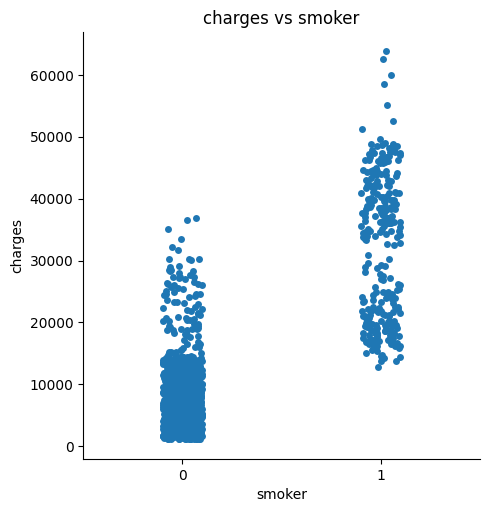

In [77]:
#Memvisualisasikan charge yang dibayar untuk orang yang merupakan non-smoker(0) dan smoker(1). 
#Dimana smoker membayar lebih tinggi daripada non-smoker.

plot = sns.catplot(data=df, x='smoker', y='charges')
plt.title('charges vs smoker')

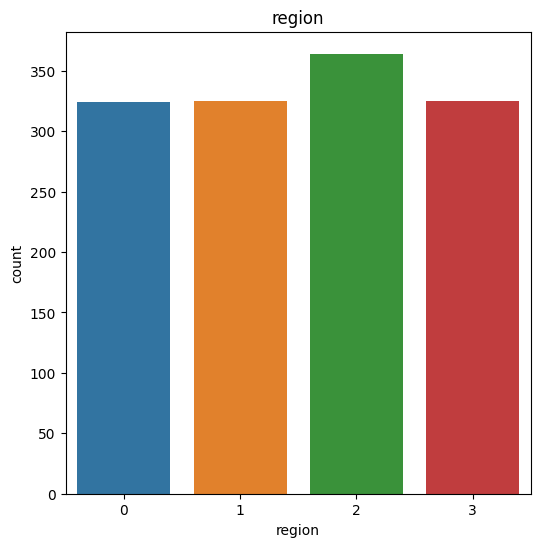

In [78]:
#Distribusi region
#dimana 0 = northeast sebanyak 300an orang
#1 = northwest sebanyak 300an orang
#2 = southeast sebanyak 350an orang, 
#3 = southwest sebanyak 300an orang.

plt.figure(figsize=(6,6))
sns.countplot(x='region', data=df)
plt.title('region')
plt.show()

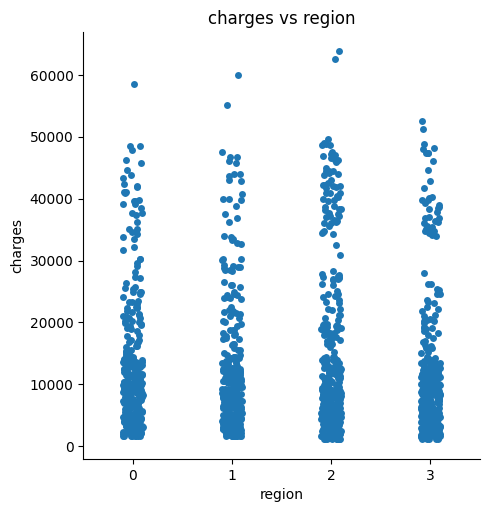

In [79]:
plot = sns.catplot(data=df, x='region', y='charges')
plt.title('charges vs region')
plt.show()

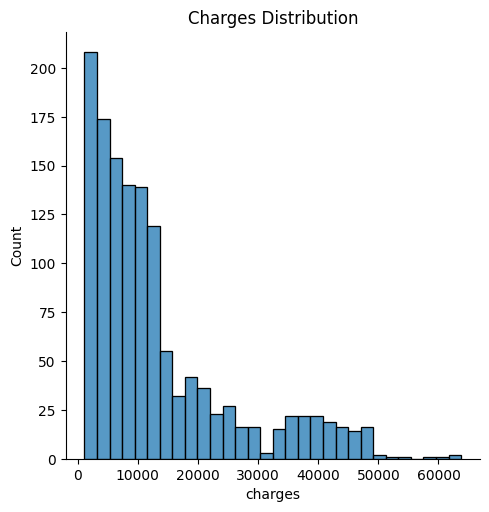

In [80]:
#Distribusi nilai charges
#dimana paling banyak ada di kisaran harga 0 - 10000.
plot = sns.displot(data=df, x='charges')
plt.title('Charges Distribution')
plt.show()

Featur Selection

In [81]:
X = df.drop(columns='charges', axis=1)
Y = df['charges']
X.shape, Y.shape

((1338, 6), (1338,))

In [82]:
print(X)

      age  sex   bmi  children  smoker  region
0      19    0  27.9         0       1       3
1      18    1  33.8         1       0       2
2      28    1  33.0         3       0       2
3      33    1  22.7         0       0       1
4      32    1  28.9         0       0       1
...   ...  ...   ...       ...     ...     ...
1333   50    1  31.0         3       0       1
1334   18    0  31.9         0       0       0
1335   18    0  36.9         0       0       2
1336   21    0  25.8         0       0       3
1337   61    0  29.1         0       1       1

[1338 rows x 6 columns]


In [84]:
print(Y)

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: charges, Length: 1338, dtype: float64


Splittig Data

In [85]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=70)

print(X_test.shape, X_train.shape, X_test.shape)

(335, 6) (1003, 6) (335, 6)


Normalization Data

In [87]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_x = scaler.fit_transform(X_train)
test_x = scaler.transform(X_test)

Model

In [ ]:
#Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [34]:
#X_train, y_train model
reg.fit(X_train, Y_train)

Y_pred = reg.predict(X_test)
score = cross_val_score(reg, X, Y, cv = 10)

In [ ]:
#Melakukan modelling menggunakan linear regression.

In [88]:
print('Nilai koefisien : ', reg.coef_)
print('Nilai intercept : ', reg.intercept_)

Nilai koefisien :  [  247.51943153  -203.97356218   331.62525324   610.73590719
 23738.92895281  -347.61505575]
Nilai intercept :  -11459.050928175871


In [ ]:
#Menampilkan nilai koefisien dan nilai intercept.

In [36]:
print('Mean Absolute Error : ', np.round(mean_absolute_error(Y_pred, Y_test), 3))
print('Mean Squared Error : ', np.round(mean_squared_error(Y_pred, Y_test), 3))
print('Root Mean Squared Error : ', np.round(np.sqrt(mean_squared_error(Y_pred, Y_test)), 3))
print('R2 Score : ', np.round(r2_score(Y_pred, Y_test), 3)*100)
print('Mean of cross validaton Score : ',np.round(np.mean(score)*100,3))

Mean Absolute Error :  4201.153
Mean Squared Error :  37770685.49
Root Mean Squared Error :  6145.786
R2 Score :  65.0
Mean of cross validaton Score :  74.482


In [ ]:
#Test Akurasi

In [37]:
test_pre = reg.predict(X_test)
test_score = r2_score(Y_test, test_pre)
print("Accuracy Test :",test_score*100)

Accuracy Test : 74.97389813742899


In [ ]:
#uji coba akurasi linear regression pada dataset.

In [38]:
pred_df = pd.DataFrame({'Actual':Y_test,'Predicted':Y_pred,'Difference':Y_test - Y_pred})
pred_df.head()

,Actual,Predicted,Difference
17,2395.17,1922.603462,472.566538
1091,11286.54,12036.950352,-750.410352
273,9617.66,10443.377457,-825.717457
270,1719.44,2457.613518,-738.173518
874,8891.14,8322.631264,568.508736


In [ ]:
#Visualisasi Linear Regression

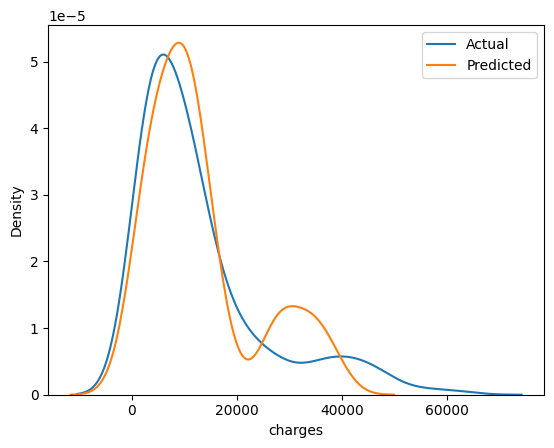

In [39]:
sns.distplot(Y_test, hist = False, label = 'Actual')
sns.distplot(Y_pred, hist = False, label = 'Predicted')
plt.legend()

Prediksi Biaya dengan Input Data

In [48]:
#age,sex,bmi,children,smoker,region
#sex : 0 = female dan 1 = male.
#smoker : tidak merokok (0), merokok (1).
#1 = northwest 
#2 = southeast  
#3 = southwest 
input_data = (18,0,33.8,1,0,2)

input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = reg.predict(input_data_reshaped)

print('Medical charge yang diprediksi : ', prediction[0])

Medical charge yang diprediksi :  4120.73819456282


Save Model

In [42]:
import pickle

filename = 'pred_insurance.sav'
pickle.dump(reg,open(filename,'wb'))